# Make our Logo!

The logo combines a number of fun `pyam` features, including

- line plots
- filling data between lines
- adding ranges of final-year data

In [1]:
import itertools
import pyam

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn-deep')

<IPython.core.display.Javascript object>

In [2]:
def func(x, factor):
    return np.sin(x) + factor * x

x = np.linspace(0, 4, 100)

In [3]:
combinations = itertools.product(['m1', 'm2', 'm3', 'm4'], ['s1', 's2', 's3'])
data = [[m, s] + ['r', 'v', 'u'] + list(func(x, 0.5 + 0.1 * i)) for i, (m, s) in enumerate(combinations)]
df = pyam.IamDataFrame(pd.DataFrame(data, columns=pyam.IAMC_IDX + list(range(len(x)))))

In [4]:
df.head()

,model,scenario,region,variable,unit,year,value
0,m1,s1,r,v,u,0,0.000000
12,m1,s1,r,v,u,1,0.060595
144,m1,s1,r,v,u,2,0.121124
276,m1,s1,r,v,u,3,0.181522
408,m1,s1,r,v,u,4,0.241722


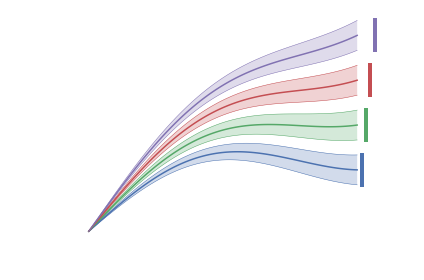

In [5]:
fig, ax = plt.subplots()
df.filter(scenario='s2').line_plot(ax=ax, color='model', legend=False, title=False)
df.filter(scenario='s2', keep=False).line_plot(ax=ax, linewidth=0.5, color='model', legend=False, title=False)
df.line_plot(ax=ax, alpha=0, color='model', fill_between=True, final_ranges=dict(linewidth=4), legend=False, title=False)
plt.axis('off')
plt.tight_layout()
fig.savefig('logo.svg', bbox_inches='tight', transparent=True, pad_inches=0)